# Predicting Diabetes Patient Readmission

LINK:

In [ ]:
# @title Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import statsmodels.api as sm

In [ ]:
# @title Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title Vendrell Dataset
%cd '/content/drive/MyDrive/College Practical Work/SEM 7/Honours/MiniProject/'

/content/drive/MyDrive/College Practical Work/SEM 7/Honours/MiniProject


In [ ]:
# @title Ashwin Dataset
# %cd ''

In [ ]:
!pwd

/content/drive/MyDrive/College Practical Work/SEM 7/Honours/MiniProject


In [ ]:
# Loading the dataset
df = pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Overview of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [ ]:
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


“<30” if the patient was readmitted in less than 30 days

“>30” if the patient was readmitted in more than 30 days

“No” for no record of readmission.

In [ ]:
df.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

Text(0, 0.5, 'Count')

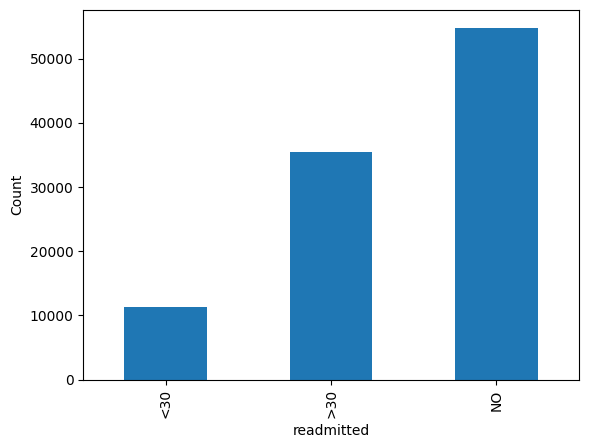

In [ ]:
df.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')

In [ ]:
df.groupby('discharge_disposition_id').size()

discharge_disposition_id
1     60234
2      2128
3     13954
4       815
5      1184
6     12902
7       623
8       108
9        21
10        6
11     1642
12        3
13      399
14      372
15       63
16       11
17       14
18     3691
19        8
20        2
22     1993
23      412
24       48
25      989
27        5
28      139
dtype: int64

In [ ]:
df = df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [ ]:
df.groupby('discharge_disposition_id').size()

discharge_disposition_id
1     60234
2      2128
3     13954
4       815
5      1184
6     12902
7       623
8       108
9        21
10        6
12        3
15       63
16       11
17       14
18     3691
22     1993
23      412
24       48
25      989
27        5
28      139
dtype: int64

In [ ]:
len(df.columns)

50

## Data Cleaning

**Remove Duplicate Data Points**

In [ ]:
#df.groupby(['patient_nbr']).count()
df['patient_nbr'].value_counts()

88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
             ..
18984456      1
75069747      1
77355873      1
32428251      1
175429310     1
Name: patient_nbr, Length: 69990, dtype: int64

In [ ]:
df = df.drop_duplicates(subset=['patient_nbr'])

In [ ]:
df['patient_nbr'].value_counts()

8222157      1
44008740     1
85032261     1
86084703     1
66764988     1
            ..
10787715     1
23334264     1
482679       1
110957688    1
175429310    1
Name: patient_nbr, Length: 69990, dtype: int64

**Dropping Uninformative Features**
<table>
      <tr>
            <th>Feature</th>
            <th>Discarding Reasons</th>
        </tr>
        <tr>
            <td>incounter_id</td>
            <td>Irrelevant to our target (readmitted)</td>
        </tr>
        <tr>
            <td>Patient_nbr</td>
            <td>Irrelevant to our target (readmitted)</td>
        </tr>
        <tr>
            <td>Weight</td>
            <td>97% of samples are missing</td>
        </tr>
        <tr>
            <td>Payer_code</td>
            <td>Irrelevant to our target (readmitted)</td>
        </tr>
        <tr>
            <td>Medical_speciality</td>
            <td>53% of samples are missing</td>
        </tr>
        <tr>
            <td>Repaglinide</td>
            <td>>100K samples not using the drug</td>
        </tr>
        <tr>
            <td>Nateglinide</td>
            <td>>100K samples not using the drug</td>
        </tr>
        <tr>
            <td>Chlorpropamide</td>
            <td>>100K samples not using the drug</td>
        </tr>
        <tr>
            <td>Acarbose</td>
            <td>>100K samples not using the drug</td>
        </tr>
        <tr>
            <td>Miglitol</td>
            <td>>100K samples not using the drug</td>
        </tr>
        <tr>
            <td>Troglitazone</td>
            <td>Only 3 patients using the drug</td>
        </tr>
        <tr>
            <td>Tolazamide</td>
            <td>Only 39 patients using the drug</td>
        </tr>
        <tr>
            <td>Examide</td>
            <td>All patients not using the drug</td>
        </tr>
        <tr>
            <td>Citoglipton</td>
            <td>All patients not using the drug</td>
        </tr>
        <tr>
            <td>Glyburide_metformin</td>
            <td>>100K samples not using the drug</td>
        </tr>
        <tr>
            <td>Glipizide_metfotmin</td>
            <td>Only 13 patients using the drug</td>
        </tr>
        <tr>
            <td>Glimepiride_pioglitazone</td>
            <td>Only 1 patient using the drug</td>
        </tr>
        <tr>
            <td>Metformin_rosiglitazone</td>
            <td>Only 2 patients using the drug</td>
        </tr>
        <tr>
            <td>Metformin_pioglitazone</td>
            <td>Only 1 patient using the drug</td>
        </tr>
        <tr>
            <td>Acetohexamide</td>
            <td>Only 1 patient using the drug</td>
        </tr>
        <tr>
            <td>tolbutamide</td>
            <td>Only 23 patients using the drug</td>
        </tr>
    </table>


In [ ]:
features_drop_list = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty', 'repaglinide', 'nateglinide', 'chlorpropamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 'acetohexamide', 'tolbutamide']


In [ ]:
df.drop(features_drop_list, axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69990 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      69990 non-null  object
 1   gender                    69990 non-null  object
 2   age                       69990 non-null  object
 3   admission_type_id         69990 non-null  int64 
 4   discharge_disposition_id  69990 non-null  int64 
 5   admission_source_id       69990 non-null  int64 
 6   time_in_hospital          69990 non-null  int64 
 7   num_lab_procedures        69990 non-null  int64 
 8   num_procedures            69990 non-null  int64 
 9   num_medications           69990 non-null  int64 
 10  number_outpatient         69990 non-null  int64 
 11  number_emergency          69990 non-null  int64 
 12  number_inpatient          69990 non-null  int64 
 13  diag_1                    69990 non-null  object
 14  diag_2               

In [ ]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,Caucasian,Female,[70-80),1,1,7,9,50,2,33,...,No,No,No,Up,No,No,Steady,Ch,Yes,>30
101755,Other,Female,[40-50),1,1,7,14,73,6,26,...,No,No,Steady,No,No,No,Up,Ch,Yes,>30
101756,Other,Female,[60-70),1,1,7,2,46,6,17,...,No,No,No,No,No,No,Steady,No,Yes,>30
101758,Caucasian,Female,[80-90),1,1,7,5,76,1,22,...,No,No,No,No,No,No,Up,Ch,Yes,NO


**Diag Features Fix**

* diag_1: First diagnose
* diag_2: Second diagnose
* diag_3: Third diagnose

In [ ]:
# setting all values containing E or V into 0 (as one category)
df.loc[df['diag_1'].str.contains('V',na=False,case=False), 'diag_1'] = 0
df.loc[df['diag_1'].str.contains('E',na=False,case=False), 'diag_1'] = 0
df.loc[df['diag_2'].str.contains('V',na=False,case=False), 'diag_2'] = 0
df.loc[df['diag_2'].str.contains('E',na=False,case=False), 'diag_2'] = 0
df.loc[df['diag_3'].str.contains('V',na=False,case=False), 'diag_3'] = 0
df.loc[df['diag_3'].str.contains('E',na=False,case=False), 'diag_3'] = 0

#setting all missing values into -1
df['diag_1'] = df['diag_1'].replace('?', -1)
df['diag_2'] = df['diag_2'].replace('?', -1)
df['diag_3'] = df['diag_3'].replace('?', -1)

#No all diag values can be converted into numeric values
df['diag_1'] = df['diag_1'].astype(float)
df['diag_2'] = df['diag_2'].astype(float)
df['diag_3'] = df['diag_3'].astype(float)

In [ ]:
# @title TEST
import numpy as np

# Define the ICD-9 code ranges and corresponding category values
ranges = [
    (1, 140, 1), (140, 240, 2), (240, 280, 3), (280, 290, 4),
    (290, 320, 5), (320, 390, 6), (390, 460, 7), (460, 520, 8),
    (520, 580, 9), (580, 630, 10), (630, 680, 11), (680, 710, 12),
    (710, 740, 13), (740, 760, 14), (760, 780, 15), (780, 800, 16),
    (800, 1000, 17), (-1, -1, 0)  # Handle missing values
]

# Iterate through the ranges and update the DataFrame for each column
for column in ['diag_1', 'diag_2', 'diag_3']:
    for start, end, category in ranges:
        df[column] = np.where(
            (df[column] >= start) & (df[column] < end),
            category,
            df[column]
        )

# Now 'diag_1', 'diag_2', and 'diag_3' columns are updated with category values

In [ ]:
df['diag_1']

0          3.0
1          3.0
2         11.0
3          1.0
4          2.0
          ... 
101754     9.0
101755    10.0
101756    17.0
101758     5.0
101765     9.0
Name: diag_1, Length: 69990, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69990 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      69990 non-null  object 
 1   gender                    69990 non-null  object 
 2   age                       69990 non-null  object 
 3   admission_type_id         69990 non-null  int64  
 4   discharge_disposition_id  69990 non-null  int64  
 5   admission_source_id       69990 non-null  int64  
 6   time_in_hospital          69990 non-null  int64  
 7   num_lab_procedures        69990 non-null  int64  
 8   num_procedures            69990 non-null  int64  
 9   num_medications           69990 non-null  int64  
 10  number_outpatient         69990 non-null  int64  
 11  number_emergency          69990 non-null  int64  
 12  number_inpatient          69990 non-null  int64  
 13  diag_1                    69990 non-null  float64
 14  diag_

**Race Feature Fix**

In [ ]:
df['race'] = df['race'].replace('?', 'Other')

In [ ]:
df.race.value_counts()

Caucasian          52305
AfricanAmerican    12627
Other               3069
Hispanic            1501
Asian                488
Name: race, dtype: int64

**Gender Feature Fix**

In [ ]:
df.gender.value_counts()

Female             37239
Male               32748
Unknown/Invalid        3
Name: gender, dtype: int64

In [ ]:
df = df[df['gender'] != 'Unknown/Invalid']

In [ ]:
df.gender.value_counts()

Female    37239
Male      32748
Name: gender, dtype: int64

Male/Female into 1/0

In [ ]:
df.loc[df['gender'] == 'Male', 'gender'] = 1
df.loc[df['gender'] == 'Female', 'gender'] = 0
df['gender'] = df['gender'].astype('int64')

df.gender.value_counts()

<ipython-input-32-17058b2f120a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].astype('int64')


0    37239
1    32748
Name: gender, dtype: int64

**Age Feature Fix**

In [ ]:
df.age.value_counts()

[70-80)     17749
[60-70)     15688
[50-60)     12351
[80-90)     11110
[40-50)      6828
[30-40)      2692
[90-100)     1761
[20-30)      1121
[10-20)       534
[0-10)        153
Name: age, dtype: int64

For age, we have 10 categories, each represents 10 years range from [0-10] to [90-100]. We will replace those with the middle age for each age range: for example (0,10] will be repleased with 5; (60, 70] will be replaces by 65; and so on.

In [ ]:
def map_age_range(age_range):
    lower, upper = age_range.strip('[]()').split('-')
    return (int(lower) + int(upper)) // 2

df['age'] = df['age'].apply(map_age_range).astype('int64')

<ipython-input-34-a427e578f63a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].apply(map_age_range).astype('int64')


**max_glue_serum Feature Fix**

In [ ]:
df.max_glu_serum.value_counts()

None    66638
Norm     1701
>200      936
>300      712
Name: max_glu_serum, dtype: int64

In [ ]:
replacements = {
    "None": 0,
    "Norm": 1,
    ">200": 2,
    ">300": 3
}
for key, value in replacements.items():
    df.loc[df['max_glu_serum'] == key, 'max_glu_serum'] = value
df['max_glu_serum'] = df['max_glu_serum'].astype('int64')
df.max_glu_serum.value_counts()

<ipython-input-36-4a755246c9e8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_glu_serum'] = df['max_glu_serum'].astype('int64')


0    66638
1     1701
2      936
3      712
Name: max_glu_serum, dtype: int64

**A1Cresult Feature Fix**

In [ ]:
df.A1Cresult.value_counts()

None    57141
>8       6239
Norm     3741
>7       2866
Name: A1Cresult, dtype: int64

In [ ]:
replacements = {
    "None": 0,
    "Norm": 1,
    ">7": 2,
    ">8": 3
}
for key, value in replacements.items():
    df.loc[df['A1Cresult'] == key, 'A1Cresult'] = value
df['A1Cresult'] = df['A1Cresult'].astype('int64')
df.A1Cresult.value_counts()

<ipython-input-38-97d80e687bfe>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['A1Cresult'] = df['A1Cresult'].astype('int64')


0    57141
3     6239
1     3741
2     2866
Name: A1Cresult, dtype: int64

**Drugs Features Fix**

In [ ]:
# df.metformin.value_counts()
# df.glimepiride.value_counts()
# df.glipizide.value_counts()
# df.glyburide.value_counts()
# df.pioglitazone.value_counts()
# df.rosiglitazone.value_counts()
df.insulin.value_counts()

No        34265
Steady    21621
Down       7324
Up         6777
Name: insulin, dtype: int64

In [ ]:
replacements = {
    "No": 0,
    "Steady": 2,
    "Down": 1,
    "Up": 3
}
drug_list = ['metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin']
for i in drug_list:
    for key, value in replacements.items():
        df.loc[df[i] == key, i] = value
    df[i] = df[i].astype('int64')


<ipython-input-40-49fd62b78013>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].astype('int64')


In [ ]:
# df.metformin.value_counts()
# df.glimepiride.value_counts()
# df.glipizide.value_counts()
# df.glyburide.value_counts()
# df.pioglitazone.value_counts()
# df.rosiglitazone.value_counts()
df.insulin.value_counts()

0    34265
2    21621
1     7324
3     6777
Name: insulin, dtype: int64

**Change Feature Fix**

In [ ]:
df.change.value_counts()

No    38492
Ch    31495
Name: change, dtype: int64

In [ ]:
replacements = {
    "No": 0,
    "Ch": 1
}
for key, value in replacements.items():
    df.loc[df['change'] == key, 'change'] = value
df['change'] = df['change'].astype('int64')
df.change.value_counts()

<ipython-input-43-b9a2145e9800>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change'] = df['change'].astype('int64')


0    38492
1    31495
Name: change, dtype: int64


**DiabetesMed Feature Fix**

In [ ]:
df.diabetesMed.value_counts()

Yes    53302
No     16685
Name: diabetesMed, dtype: int64

In [ ]:
replacements = {
    "Yes": 1,
    "No": 0
}

for key, value in replacements.items():
    df.loc[df['diabetesMed'] == key, 'diabetesMed'] = value
df['diabetesMed'] = df['diabetesMed'].astype('int64')
df.diabetesMed.value_counts()

<ipython-input-45-406d262208f7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diabetesMed'] = df['diabetesMed'].astype('int64')


1    53302
0    16685
Name: diabetesMed, dtype: int64

**Target Feature Fix**

In [ ]:
df.readmitted.value_counts()

NO     41476
>30    22226
<30     6285
Name: readmitted, dtype: int64

In [ ]:
replacements = {
    "NO": 0,
    ">30": 1,
    "<30": 1
}
for key, value in replacements.items():
    df.loc[df['readmitted'] == key, 'readmitted'] = value
df['readmitted'] = df['readmitted'].astype('int64')
df.readmitted.value_counts()

<ipython-input-47-e71a34be701f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['readmitted'] = df['readmitted'].astype('int64')


0    41476
1    28511
Name: readmitted, dtype: int64

## Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69987 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      69987 non-null  object 
 1   gender                    69987 non-null  int64  
 2   age                       69987 non-null  int64  
 3   admission_type_id         69987 non-null  int64  
 4   discharge_disposition_id  69987 non-null  int64  
 5   admission_source_id       69987 non-null  int64  
 6   time_in_hospital          69987 non-null  int64  
 7   num_lab_procedures        69987 non-null  int64  
 8   num_procedures            69987 non-null  int64  
 9   num_medications           69987 non-null  int64  
 10  number_outpatient         69987 non-null  int64  
 11  number_emergency          69987 non-null  int64  
 12  number_inpatient          69987 non-null  int64  
 13  diag_1                    69987 non-null  float64
 14  diag_

<ipython-input-49-8e88e4c63647>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


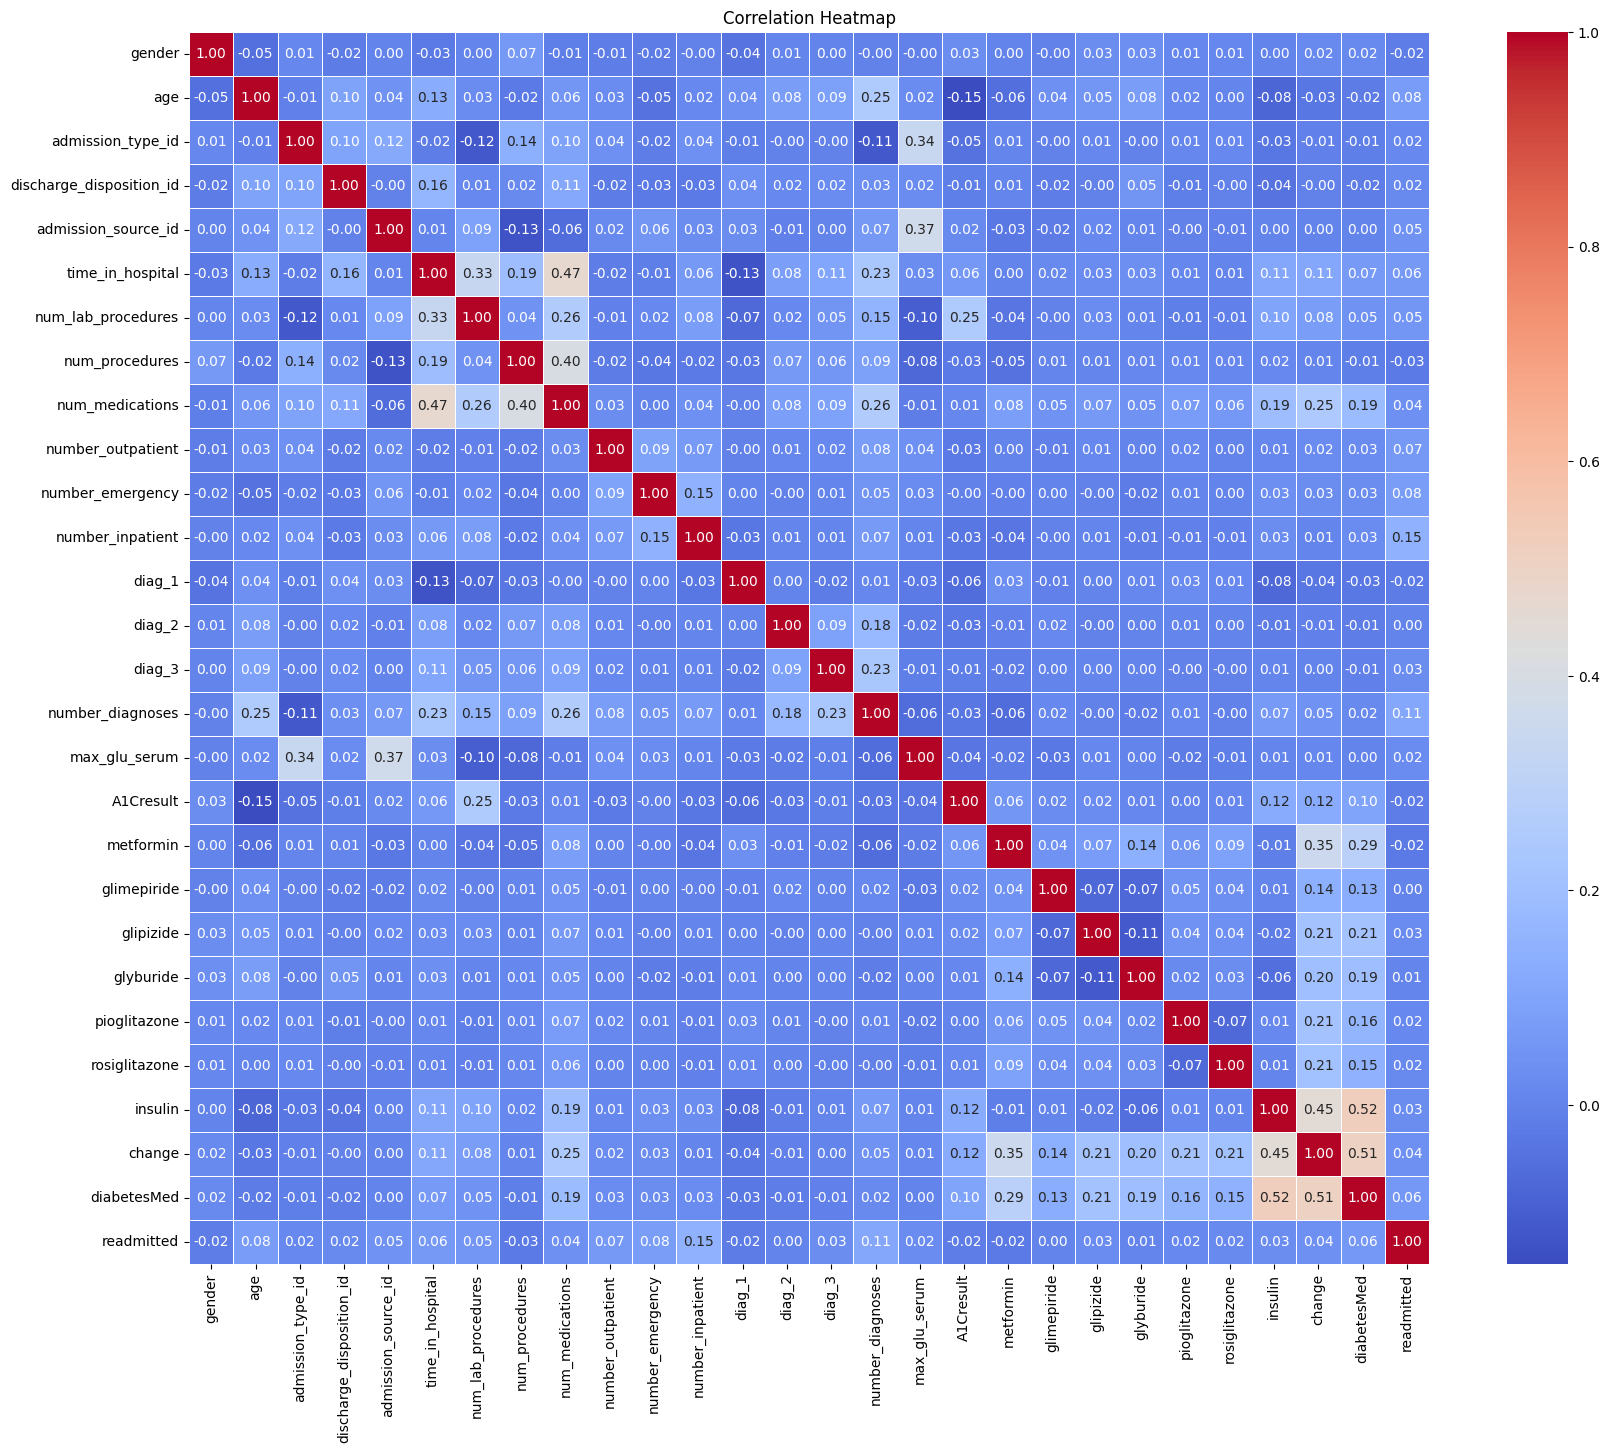

In [ ]:
# Correlation matrix and heatmap
correlation_matrix = df.corr()
# print(correlation_matrix)
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Patient Analysis**

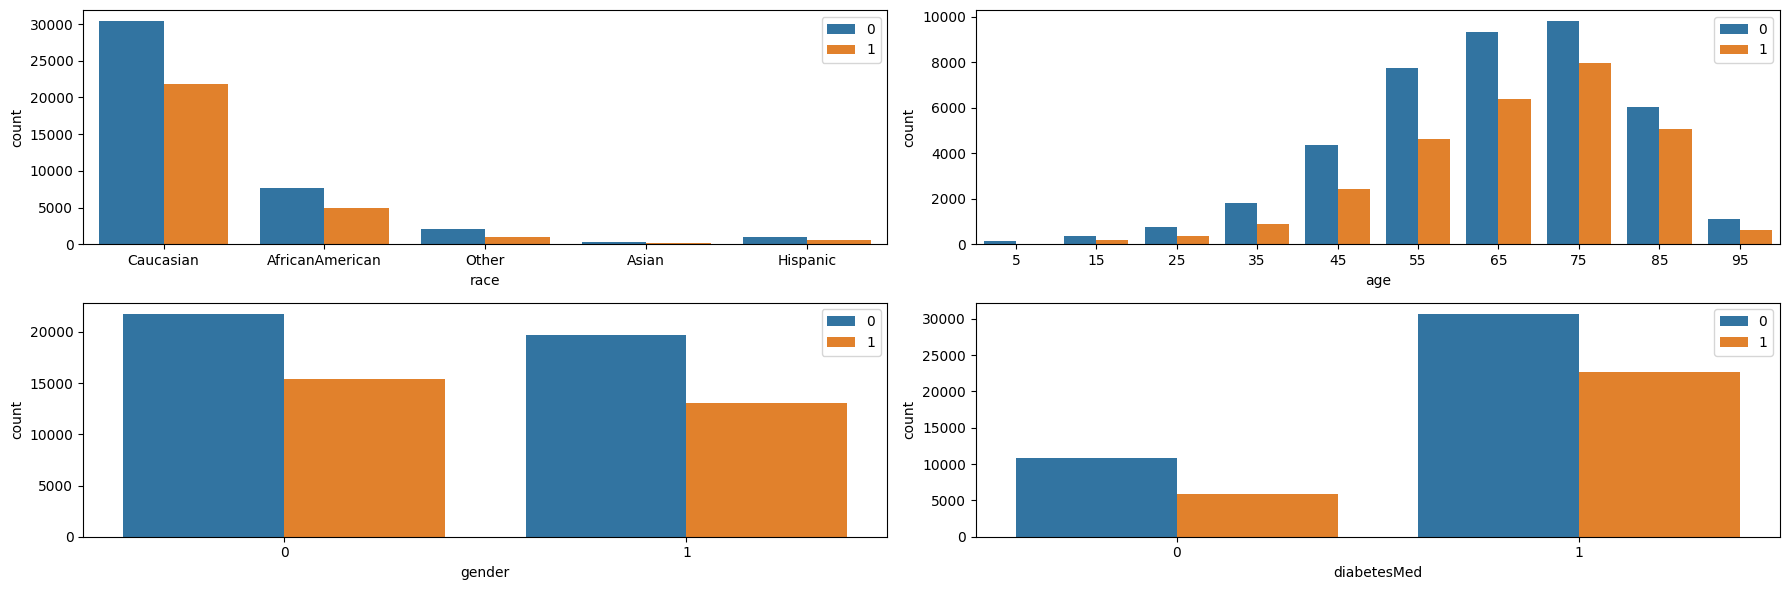

In [ ]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=df, x='race', hue='readmitted', ax=ax1)
sns.countplot(data=df, x='age', hue='readmitted', ax=ax2)
sns.countplot(data=df, x='gender', hue='readmitted', ax=ax3)
sns.countplot(data=df, x='diabetesMed', hue='readmitted', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()

readmittion has simmilar distripution across different races.

Very few cases of readmition for youbnger patients (< 40).

Females have slightly higher rate of no readmittion than males.

readmittion has simmilar distripution for patients with and without prescribed diabetes medications prior to hospital encounter.

**Drugs Analysis**

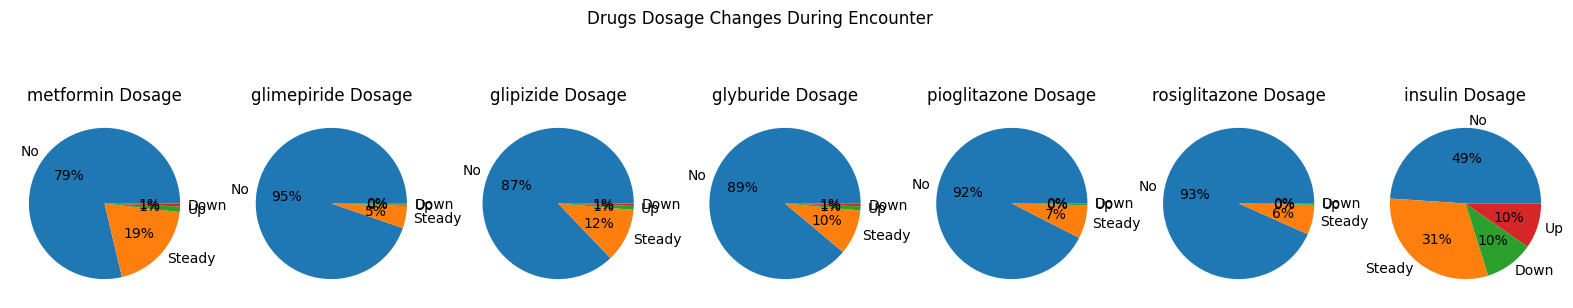

In [ ]:
fig, ax = plt.subplots(1, 7,figsize=(20, 4), subplot_kw=dict(aspect="equal"))
ax[0].pie(df['metformin'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[0].set_title('metformin Dosage')
ax[1].pie(df['glimepiride'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[1].set_title('glimepiride Dosage')
ax[2].pie(df['glipizide'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[2].set_title('glipizide Dosage')
ax[3].pie(df['glyburide'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[3].set_title('glyburide Dosage')
ax[4].pie(df['pioglitazone'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[4].set_title('pioglitazone Dosage')
ax[5].pie(df['rosiglitazone'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[5].set_title('rosiglitazone Dosage')
ax[6].pie(df['insulin'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Down', 'Up'])
ax[6].set_title('insulin Dosage')

fig.suptitle('Drugs Dosage Changes During Encounter')
plt.show()

**Time in Hospital and Readmission**

<ipython-input-52-27c60f86bad3>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='No readmittion')
<ipython-input-52-27c60f86bad3>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmittion in >30 days')
<ipython-input-52-27c60f86bad3>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 2),'time_in_hospital'] , color='y',shade=True, label='Readmitted in <30 days')


Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

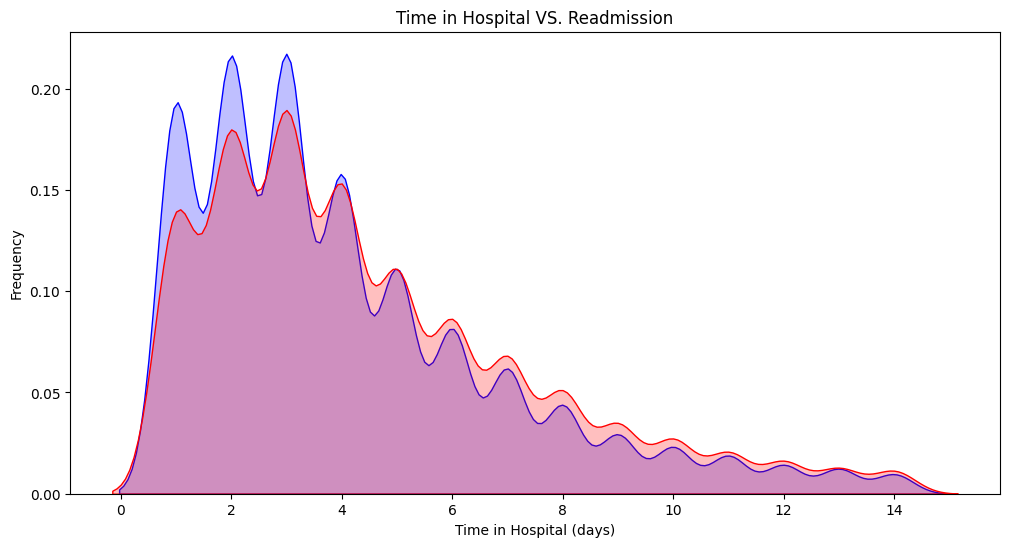

In [ ]:
fig = plt.figure(figsize=(12,6))
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='No readmittion')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmittion in >30 days')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 2),'time_in_hospital'] , color='y',shade=True, label='Readmitted in <30 days')
ax.set(xlabel='Time in Hospital (days)', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

In [ ]:
# @title Drop the low correlated features
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Define a threshold for high correlation
threshold = 0.4  # You can adjust this threshold as needed

# Find pairs of highly correlated features
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_features.add(colname_i)
            highly_correlated_features.add(colname_j)

# Drop the low correlated features from X_scaled
df_filtered = df.drop(columns=highly_correlated_features)

# Print the filtered DataFrame
df_filtered.head()

<ipython-input-53-dd5b49ad16cc>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,num_lab_procedures,number_outpatient,number_emergency,number_inpatient,...,number_diagnoses,max_glu_serum,A1Cresult,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,readmitted
0,Caucasian,0,5,6,25,1,41,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Caucasian,0,15,1,1,7,59,0,0,0,...,9,0,0,0,0,0,0,0,0,1
2,AfricanAmerican,0,25,1,1,7,11,2,0,1,...,6,0,0,0,0,2,0,0,0,0
3,Caucasian,1,35,1,1,7,44,0,0,0,...,7,0,0,0,0,0,0,0,0,0
4,Caucasian,1,45,1,1,7,51,0,0,0,...,5,0,0,0,0,2,0,0,0,0


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69987 entries, 0 to 101765
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      69987 non-null  object 
 1   gender                    69987 non-null  int64  
 2   age                       69987 non-null  int64  
 3   admission_type_id         69987 non-null  int64  
 4   discharge_disposition_id  69987 non-null  int64  
 5   admission_source_id       69987 non-null  int64  
 6   num_lab_procedures        69987 non-null  int64  
 7   number_outpatient         69987 non-null  int64  
 8   number_emergency          69987 non-null  int64  
 9   number_inpatient          69987 non-null  int64  
 10  diag_1                    69987 non-null  float64
 11  diag_2                    69987 non-null  float64
 12  diag_3                    69987 non-null  float64
 13  number_diagnoses          69987 non-null  int64  
 14  max_g

## Data Preprocessing

In [ ]:
df_filtered = pd.concat([df_filtered,pd.get_dummies(df['race'], prefix='race')], axis=1).drop(['race'],axis=1)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69987 entries, 0 to 101765
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    69987 non-null  int64  
 1   age                       69987 non-null  int64  
 2   admission_type_id         69987 non-null  int64  
 3   discharge_disposition_id  69987 non-null  int64  
 4   admission_source_id       69987 non-null  int64  
 5   num_lab_procedures        69987 non-null  int64  
 6   number_outpatient         69987 non-null  int64  
 7   number_emergency          69987 non-null  int64  
 8   number_inpatient          69987 non-null  int64  
 9   diag_1                    69987 non-null  float64
 10  diag_2                    69987 non-null  float64
 11  diag_3                    69987 non-null  float64
 12  number_diagnoses          69987 non-null  int64  
 13  max_glu_serum             69987 non-null  int64  
 14  A1Cre

## Model

In [ ]:
y = df_filtered['readmitted']
X = df_filtered.drop(['readmitted'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,shuffle=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier()
rfm.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = rfm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.6149625650111448
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.79      0.71     10398
           1       0.54      0.36      0.43      7099

    accuracy                           0.61     17497
   macro avg       0.59      0.57      0.57     17497
weighted avg       0.60      0.61      0.60     17497



In [ ]:
# @title Save the model to a file
import joblib
joblib.dump(rfm, 'rmf_classifier_v4.pkl')

['rmf_classifier_v4.pkl']